# Time dependence - amplitude phase jump

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

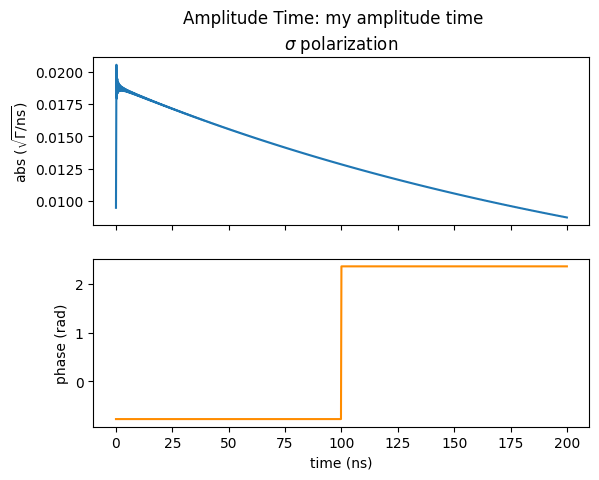

In [2]:
class PhaseJump(nx.FunctionTime):
    def __init__(self, t0):
        super().__init__("phase jump")
        self.t0 = t0

    def Function(self, time):
        phase = 0
        if time > self.t0:
            phase = np.pi
        return phase

func = PhaseJump(100)

detuning = func.CreateDetuning(400, 4000)

mat = nx.Material.Template(nx.lib.material.Fe)

site = nx.Hyperfine(magnetic_field = 0,
                    isotropic = True)

mat.hyperfine_sites = [site]

lay = nx.Layer(id = "iron",
               thickness = 1000,  # in nanometer
               material = mat)

sample = nx.Sample(id = "my sample",
                   layers = [lay],
                   geometry = "f",
                   function_time = func)

beam = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(id = "my experiment",
                    beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

amp_time = nx.AmplitudeTime(experiment = exp,
                            time_length = 200,
                            time_step = 0.2,
                            id = "my amplitude time",
                            fft_window = "none")

time_axis, amp = amp_time.Calculate()

amp_sigma = amp[:,0]
amp_pi = amp[:,1]

amp_time.Plot(sigma=True, pi=False, polar=True, unwrap=False)